# **Import Libraries**

In [1]:
import pandas as pd # Database management
import numpy as np # Array
import re # Regular Expressions
import emoji # Emoji
import emot # Emoticon
import plotly.express as px # Graphs
import plotly.graph_objs as go # Graphs
from plotly.subplots import make_subplots # Graphs
from collections import Counter # Count

# **Data**

This is a Whatsapp chat from november 2020 to february 2024

In [2]:
df = pd.read_table("chat.txt", header = None, on_bad_lines = "warn", names = ["text"])
df

C:\Users\acast\AppData\Local\Temp\ipykernel_14880\2745178798.py:1: ParserWarning: Skipping line 37236: expected 1 fields, saw 2
Skipping line 37237: expected 1 fields, saw 2
Skipping line 37238: expected 1 fields, saw 2
Skipping line 37239: expected 1 fields, saw 2
Skipping line 37240: expected 1 fields, saw 2
Skipping line 39691: expected 1 fields, saw 2
Skipping line 41824: expected 1 fields, saw 4

  df = pd.read_table("chat.txt", header = None, on_bad_lines = "warn", names = ["text"])


,text
0,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
1,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
2,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
3,"11/30/20, 8:01 PM - Alejandro Castellanos: <Me..."
4,"11/30/20, 8:01 PM - Alejandro Castellanos: Te ..."
...,...
71450,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Me haces un..."
71451,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Fecha de ho..."
71452,"2/14/24, 10:34 AM - Alejandro Castellanos: Wed..."
71453,"February 14, 2024"


# **Data Wrangling**

In [3]:
# # Deleted Messages
df = df[~df["text"].str.contains("This message was deleted")]

# Delete all rows with "Media omitted" Message
df = df[~df["text"].str.contains("Media omitted")]

# Delete row with line breaks or without time data, string patter "M - " such as "PM - " or "AM - "
df = df[df["text"].str.contains("M - ")]

df

,text
4,"11/30/20, 8:01 PM - Alejandro Castellanos: Te ..."
5,"11/30/20, 8:03 PM - Coneja Bebé 🐰: 🐇🐇🐇🐇🐇🐇🐇"
6,"11/30/20, 8:08 PM - Coneja Bebé 🐰: 😘"
7,"11/30/20, 8:08 PM - Coneja Bebé 🐰: Más amor co..."
9,"11/30/20, 8:17 PM - Coneja Bebé 🐰: 😘😘😘"
...,...
71449,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Sipo"
71450,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Me haces un..."
71451,"2/14/24, 10:32 AM - Coneja Bebé 🐰: Fecha de ho..."
71452,"2/14/24, 10:34 AM - Alejandro Castellanos: Wed..."


Split **data** and **text information**

In [4]:

df = df["text"].str.split(" - ", expand = True)
df

,0,1,2
4,"11/30/20, 8:01 PM",Alejandro Castellanos: Te quiero conejita,None
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰: 🐇🐇🐇🐇🐇🐇🐇,None
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰: 😘,None
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰: Más amor como de conejo,None
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰: 😘😘😘,None
...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰: Sipo,None
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰: Me haces un favor,None
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰: Fecha de hoy en ingles,None
71452,"2/14/24, 10:34 AM",Alejandro Castellanos: Wednesday,None


Split **Users** and **Message** based on `:` delimiter

In [5]:
df[[1, 2, 3, 4]] = df[1].str.split(": ", expand  = True)
df

,0,1,2,3,4
4,"11/30/20, 8:01 PM",Alejandro Castellanos,Te quiero conejita,None,None
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰,🐇🐇🐇🐇🐇🐇🐇,None,None
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰,😘,None,None
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰,Más amor como de conejo,None,None
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰,😘😘😘,None,None
...,...,...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Sipo,None,None
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Me haces un favor,None,None
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Fecha de hoy en ingles,None,None
71452,"2/14/24, 10:34 AM",Alejandro Castellanos,Wednesday,None,None


Fill `NaN` values and combine message columns *(2, 3, 4)*

In [6]:
df.fillna("", inplace = True)
df[5] = df[2] + " " + df[3] + " "+ df [4]
df

,0,1,2,3,4,5
4,"11/30/20, 8:01 PM",Alejandro Castellanos,Te quiero conejita,,,Te quiero conejita
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰,🐇🐇🐇🐇🐇🐇🐇,,,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰,😘,,,😘
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰,Más amor como de conejo,,,Más amor como de conejo
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰,😘😘😘,,,😘😘😘
...,...,...,...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Sipo,,,Sipo
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Me haces un favor,,,Me haces un favor
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Fecha de hoy en ingles,,,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",Alejandro Castellanos,Wednesday,,,Wednesday


Keep the **Date**, **Users** and **Message** columns

In [7]:
df.drop([2, 3, 4], axis = 1, inplace = True)
df

,0,1,5
4,"11/30/20, 8:01 PM",Alejandro Castellanos,Te quiero conejita
5,"11/30/20, 8:03 PM",Coneja Bebé 🐰,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",Coneja Bebé 🐰,😘
7,"11/30/20, 8:08 PM",Coneja Bebé 🐰,Más amor como de conejo
9,"11/30/20, 8:17 PM",Coneja Bebé 🐰,😘😘😘
...,...,...,...
71449,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Sipo
71450,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Me haces un favor
71451,"2/14/24, 10:32 AM",Coneja Bebé 🐰,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",Alejandro Castellanos,Wednesday


Change the name of the users

In [8]:
df[1] = df[1].apply(lambda x: "A" if "Alejandro" in x else "L")
df

,0,1,5
4,"11/30/20, 8:01 PM",A,Te quiero conejita
5,"11/30/20, 8:03 PM",L,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",L,😘
7,"11/30/20, 8:08 PM",L,Más amor como de conejo
9,"11/30/20, 8:17 PM",L,😘😘😘
...,...,...,...
71449,"2/14/24, 10:32 AM",L,Sipo
71450,"2/14/24, 10:32 AM",L,Me haces un favor
71451,"2/14/24, 10:32 AM",L,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",A,Wednesday


Change the name of the columns

In [9]:
df.columns = ["Complete Date", "User", "Message"]
df

,Complete Date,User,Message
4,"11/30/20, 8:01 PM",A,Te quiero conejita
5,"11/30/20, 8:03 PM",L,🐇🐇🐇🐇🐇🐇🐇
6,"11/30/20, 8:08 PM",L,😘
7,"11/30/20, 8:08 PM",L,Más amor como de conejo
9,"11/30/20, 8:17 PM",L,😘😘😘
...,...,...,...
71449,"2/14/24, 10:32 AM",L,Sipo
71450,"2/14/24, 10:32 AM",L,Me haces un favor
71451,"2/14/24, 10:32 AM",L,Fecha de hoy en ingles
71452,"2/14/24, 10:34 AM",A,Wednesday


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62754 entries, 4 to 71454
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Complete Date  62754 non-null  object
 1   User           62754 non-null  object
 2   Message        62754 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


There are **62754** Messages

Set **Date** column with datetime format

In [11]:
df["Complete Date"] = pd.to_datetime(df["Complete Date"])
df.info()

C:\Users\acast\AppData\Local\Temp\ipykernel_14880\3965983632.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Complete Date"] = pd.to_datetime(df["Complete Date"])


<class 'pandas.core.frame.DataFrame'>
Index: 62754 entries, 4 to 71454
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Complete Date  62754 non-null  datetime64[ns]
 1   User           62754 non-null  object        
 2   Message        62754 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.9+ MB


Create a **Regex Function** for several operations:
* Lowercase the messages
* Delete messages with URL
* Remove numbers
* Remove messages with spaces
* Remove special characters
* Remove repeated letters

In [12]:
def modify_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text) # Messages with URL
    text = re.sub(r"[0-9]+","", text) # Remove Numbers
    text = re.sub(r"\s+"," ", text) # Remove Messages with several spaces
    text = re.sub(r"[^\w\s]|_", "", text) # Remove special characters
    text = re.sub(r"([a-zA-Z])\1\1","\\1", text) # remove repeated letters
    return text

In [13]:
df["Message_Modified"] =  df["Message"].apply(modify_text)
df

,Complete Date,User,Message,Message_Modified
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,
6,2020-11-30 20:08:00,L,😘,
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo
9,2020-11-30 20:17:00,L,😘😘😘,
...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles
71452,2024-02-14 10:34:00,A,Wednesday,wednesday


Identify **emojis** based on special characters and replace them with standard emojis

In [14]:
emot_obj = emot.emot()

df["Message"].apply(lambda x: "" if re.compile(r"http\S+").search(x) else "".join(emot_obj.emoticons(x)["value"])
                    ).value_counts().rename_axis("emoticon").reset_index(name="count").query("emoticon != ' '")[["emoticon"]]


,emoticon
0,
1,:3
2,:(
3,:P
4,:)
5,oO
6,:|
7,:3:3
8,=3
9,:o


In [15]:
df["Message"] = df["Message"].replace({":3": "😊", 
                                       ":\(": "🙁",
                                       ":P": "😋",
                                       ":\)": "😊",
                                       "oO": "🤪",
                                       ":\|": "😐",
                                       ":3:3": "😊",
                                       "=3": "😊",
                                       ":o": "😮",
                                       ":3:P": "😋"}, regex=True)

Create a **Emoji** column

In [16]:
# emoji extraction
df["Emoji"] = df["Message"].apply(lambda x: "".join(c for c in x if c in emoji.EMOJI_DATA))
df

,Complete Date,User,Message,Message_Modified,Emoji
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita,
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,,🐇🐇🐇🐇🐇🐇🐇
6,2020-11-30 20:08:00,L,😘,,😘
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo,
9,2020-11-30 20:17:00,L,😘😘😘,,😘😘😘
...,...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo,
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor,
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles,
71452,2024-02-14 10:34:00,A,Wednesday,wednesday,


**Time information** based on **Date**

In [17]:
df["Date"] = df["Complete Date"].dt.date.astype("datetime64[ns]") # Datetime type
df["Month"] = df["Complete Date"].dt.month_name() # Month
df["Day"] = df["Complete Date"].dt.day # Day
df["Day_Week"] = df["Complete Date"].dt.day_name() # Week Day
df["Hour"] = df["Complete Date"].dt.hour # Hour
df

,Complete Date,User,Message,Message_Modified,Emoji,Date,Month,Day,Day_Week,Hour
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita,,2020-11-30,November,30,Monday,20
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,,🐇🐇🐇🐇🐇🐇🐇,2020-11-30,November,30,Monday,20
6,2020-11-30 20:08:00,L,😘,,😘,2020-11-30,November,30,Monday,20
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo,,2020-11-30,November,30,Monday,20
9,2020-11-30 20:17:00,L,😘😘😘,,😘😘😘,2020-11-30,November,30,Monday,20
...,...,...,...,...,...,...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo,,2024-02-14,February,14,Wednesday,10
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor,,2024-02-14,February,14,Wednesday,10
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles,,2024-02-14,February,14,Wednesday,10
71452,2024-02-14 10:34:00,A,Wednesday,wednesday,,2024-02-14,February,14,Wednesday,10


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62754 entries, 4 to 71454
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Complete Date     62754 non-null  datetime64[ns]
 1   User              62754 non-null  object        
 2   Message           62754 non-null  object        
 3   Message_Modified  62754 non-null  object        
 4   Emoji             62754 non-null  object        
 5   Date              62754 non-null  datetime64[ns]
 6   Month             62754 non-null  object        
 7   Day               62754 non-null  int32         
 8   Day_Week          62754 non-null  object        
 9   Hour              62754 non-null  int32         
dtypes: datetime64[ns](2), int32(2), object(6)
memory usage: 4.8+ MB


# **Exploratory Data Analysis (EDA)**

## *Who has sent the highest number of messages?*

In [19]:
px.bar(pd.DataFrame(df["User"].value_counts()).reset_index(), 
             x = "User", 
             y = "count",
             color = "User",
             title = "Total Number of Message per User")

## *Messages through time*

In [20]:
px.line(pd.DataFrame(df["Date"].value_counts().sort_index()).reset_index(),
        x = "Date",
        y = "count",
        title = "Messages per Day",
        color_discrete_sequence = ["#8E44AD"])

In [21]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pd.DataFrame(df["Month"].value_counts().reindex(months, axis=0).reset_index())

,Month,count
0,January,6296
1,February,4286
2,March,3112
3,April,3776
4,May,6842
5,June,6132
6,July,4816
7,August,4020
8,September,3645
9,October,3539


In [22]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

px.bar(pd.DataFrame(df["Month"].value_counts().reindex(months, axis=0).reset_index()), 
             x = "Month", 
             y = "count",
             title = "Messages per Month",
             color_discrete_sequence = ["#52BE80"])

In [23]:
fig = px.line(pd.DataFrame(df["Day"].value_counts().reset_index().sort_values(by = ["Day"])), 
             x = "Day", 
             y = "count",
             title = "Messages per Days of the Month",
             color_discrete_sequence = ["#CD6155"],
             markers =  True)

fig.update_layout(xaxis = dict(tickmode = "linear", tick0 = 1, dtick = 1))
fig.update_xaxes(range = [1, 31])

In [24]:
day_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

px.bar(pd.DataFrame(df["Day_Week"].value_counts().reindex(day_week, axis=0).reset_index()), 
             x = "Day_Week", 
             y = "count",
             title = "Messages per Days of the Week",
             color_discrete_sequence = ["#E67E22"])

In [25]:
fig = px.line(pd.DataFrame(df["Hour"].value_counts().reset_index().sort_values(by = ["Hour"])), 
             x = "Hour", 
             y = "count",
             title = "Messages per Hour",
             color_discrete_sequence = ["#3498DB"],
             markers =  True)
             
fig.update_layout(xaxis = dict(tickmode = "linear", tick0 = 1, dtick = 1))
fig.update_xaxes(range = [0, 23])

In [26]:

pivot = pd.pivot_table(df, index = "Hour", columns="Day_Week", values="Message", aggfunc="count").fillna(0)
heatmap = go.Heatmap(z = pivot.values,
                     x = pivot.columns,
                     y = pivot.index,
                     hovertemplate = "Interventions at %{y}-hour<extra>%{z}</extra>",
                     colorscale = "Oranges")

fig = go.Figure(data = [heatmap])

fig.update_layout(title = "Heat Map: Day of the Week vs. Hour of the Day",
                  xaxis={"categoryorder": "array",
                         "categoryarray": ["Monday", 
                                           "Tuesday", 
                                           "Wednesday",
                                           "Thursday", 
                                           "Friday", 
                                           "Saturday", 
                                           "Sunday"]})

fig.show()

## *Emojis  by User*

In [27]:
df.groupby("User").agg({"Emoji": lambda x: " ".join(set(emoji for emojis in x.dropna() for emoji in emojis))}).assign(Quantity = [len(df[df["Emoji"] != ""][["User", "Emoji"]].groupby("User").sum().iloc[0,0]), 
                                                                                                                                  len(df[df["Emoji"] != ""][["User", "Emoji"]].groupby("User").sum().iloc[1,0])])


,Emoji,Quantity
User,,
A,🍖 ☹ ❤ 🫠 📸 😘 😋 😑 😜 🚀 😅 🎉 🦆 🤫 😶 🤔 ☠ 🐄 🤢 😢 😡 🏫 ⚡ ...,12255
L,💳 🤯 🙏 🛝 ☹ 🎤 💜 ❤ 🫠 🎄 😘 😋 😅 😑 😜 🫘 🎉 🤫 🦆 😶 🤔 🧡 🏉 ...,9521


### Top Emojis for User **A**

In [28]:
list_A = []

for emoji in "".join(df[(df["User"] == "A") & (df["Emoji"] != "")]["Emoji"]):
    list_A.append(emoji)

Counter(list_A).most_common()[:5]



[('😘', 7403), ('🥺', 1058), ('😬', 411), ('🤪', 277), ('❤', 266)]

### Top Emojis for User **L**

In [29]:
list_L = []

for emoji in "".join(df[(df["User"] == "L") & (df["Emoji"] != "")]["Emoji"]):
    list_L.append(emoji)

Counter(list_L).most_common()[:5]

[('🥺', 1378), ('😘', 1111), ('🥰', 912), ('☺', 622), ('😊', 587)]

### Emojis in Messages

In [30]:
fig = go.Figure(data=go.Pie(labels = ["Chats without emoji", "Chats with emoji"],
                            values = df.assign(is_emoji = df["Emoji"].apply(lambda x: True if x != "" else False)).groupby("is_emoji").count()[["Message"]].reset_index()["Message"],
                            hole = 0.5, 
                            marker = dict(colors=[ "#DBB534", "#34D3DB"])))
fig.update_traces(hoverinfo = "label + value")

## *Count of Words*

In [31]:
df["Number_Words"] = df["Message_Modified"].apply(lambda x: len(x.split()))
df

,Complete Date,User,Message,Message_Modified,Emoji,Date,Month,Day,Day_Week,Hour,Number_Words
4,2020-11-30 20:01:00,A,Te quiero conejita,te quiero conejita,,2020-11-30,November,30,Monday,20,3
5,2020-11-30 20:03:00,L,🐇🐇🐇🐇🐇🐇🐇,,🐇🐇🐇🐇🐇🐇🐇,2020-11-30,November,30,Monday,20,0
6,2020-11-30 20:08:00,L,😘,,😘,2020-11-30,November,30,Monday,20,0
7,2020-11-30 20:08:00,L,Más amor como de conejo,más amor como de conejo,,2020-11-30,November,30,Monday,20,5
9,2020-11-30 20:17:00,L,😘😘😘,,😘😘😘,2020-11-30,November,30,Monday,20,0
...,...,...,...,...,...,...,...,...,...,...,...
71449,2024-02-14 10:32:00,L,Sipo,sipo,,2024-02-14,February,14,Wednesday,10,1
71450,2024-02-14 10:32:00,L,Me haces un favor,me haces un favor,,2024-02-14,February,14,Wednesday,10,4
71451,2024-02-14 10:32:00,L,Fecha de hoy en ingles,fecha de hoy en ingles,,2024-02-14,February,14,Wednesday,10,5
71452,2024-02-14 10:34:00,A,Wednesday,wednesday,,2024-02-14,February,14,Wednesday,10,1


In [32]:
px.box(df[df["Number_Words"] > 0][["User", "Number_Words"]],
       x = "User",
       y = "Number_Words",
       color = "User",
       log_y=True)

## *WordCloud*

In [33]:
import stylecloud
from IPython.display import Image # Display word cloud image

### General Conversation

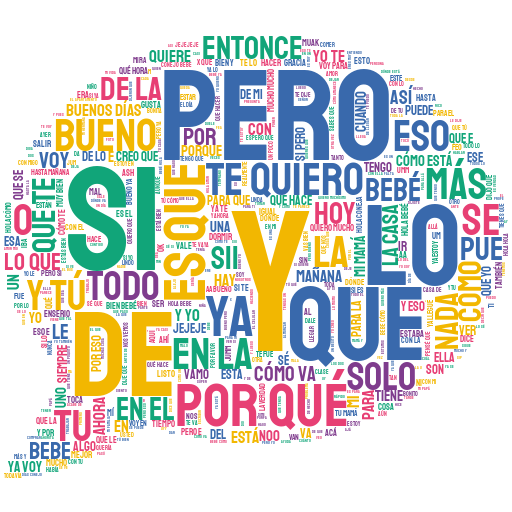

In [34]:
stylecloud.gen_stylecloud(' '.join(df["Message_Modified"]),
                          icon_name = "fas fa-comment",
                          output_name = "Images/both.png")

Image("Images/both.png")

In [35]:
from stop_words import get_stop_words # Stop words for several languages

stop_words_spanish = get_stop_words("spanish")
stop_words_spanish[:10]

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra']

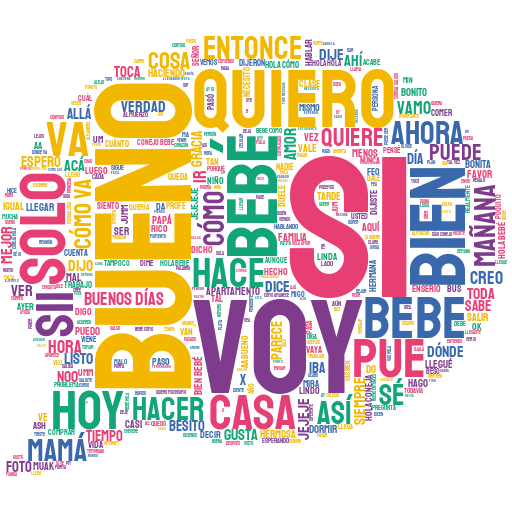

In [36]:
stylecloud.gen_stylecloud(' '.join(df["Message_Modified"]),
                          icon_name = "fas fa-comment",
                          output_name = "Images/both+sw.png",
                          custom_stopwords = stop_words_spanish)

Image("Images/both+sw.png")

### WordCloud by User

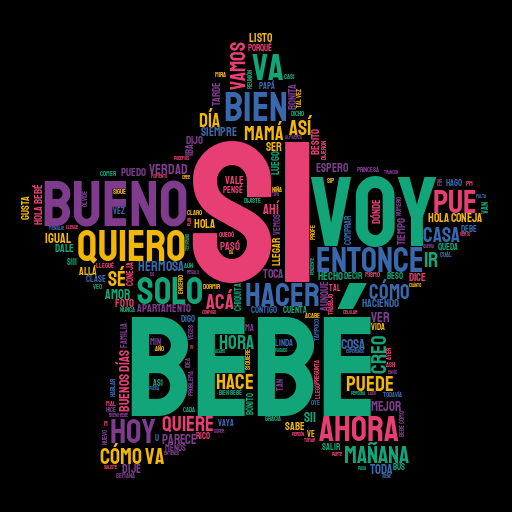

In [37]:
stylecloud.gen_stylecloud(' '.join(df[df["User"] == "A"]["Message_Modified"]),
                          icon_name = "fas fa-star",
                          output_name = "Images/A+sw.png",
                          custom_stopwords = stop_words_spanish,
                          background_color="black")

Image("Images/A+sw.png")

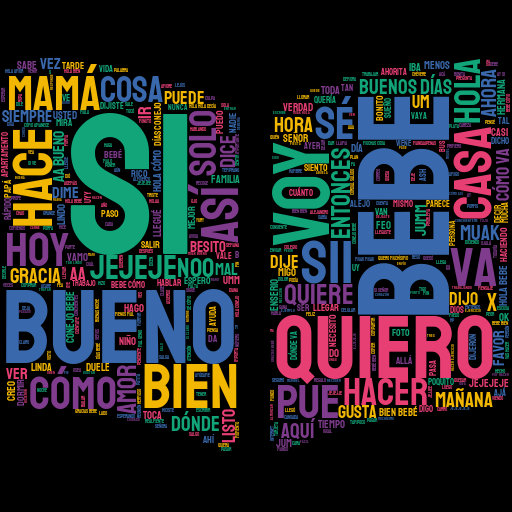

In [38]:
stylecloud.gen_stylecloud(' '.join(df[df["User"] == "L"]["Message_Modified"]),
                          icon_name = "fas fa-book-open",
                          output_name = "Images/L+sw.png",
                          custom_stopwords = stop_words_spanish,
                          background_color="black")

Image("Images/L+sw.png")

## *Sentiment Analysis*

In [39]:
df2 = df[df["Message_Modified"] != " "][["Date", "User", "Message_Modified"]]
df2

,Date,User,Message_Modified
4,2020-11-30,A,te quiero conejita
7,2020-11-30,L,más amor como de conejo
10,2020-11-30,L,que haces
12,2020-11-30,A,programando bebé
14,2020-11-30,A,y pensandote mucho
...,...,...,...
71449,2024-02-14,L,sipo
71450,2024-02-14,L,me haces un favor
71451,2024-02-14,L,fecha de hoy en ingles
71452,2024-02-14,A,wednesday


### Spanish Analysis

In [40]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

c:\Users\acast\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\acast\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [41]:
df2["Sentiment"] = df2["Message_Modified"].apply(lambda x: sentiment.sentiment(x))
df2

,Date,User,Message_Modified,Sentiment
4,2020-11-30,A,te quiero conejita,0.209633
7,2020-11-30,L,más amor como de conejo,0.210284
10,2020-11-30,L,que haces,0.302997
12,2020-11-30,A,programando bebé,0.388172
14,2020-11-30,A,y pensandote mucho,0.347310
...,...,...,...,...
71449,2024-02-14,L,sipo,0.497892
71450,2024-02-14,L,me haces un favor,0.070254
71451,2024-02-14,L,fecha de hoy en ingles,0.032891
71452,2024-02-14,A,wednesday,0.497892


In [42]:
px.line(df2[["Date", "Sentiment"]].groupby("Date").mean().reset_index(),
        x = "Date",
        y = "Sentiment",
        title = "Sentiment per Day [Spanish]",
        color_discrete_sequence = ["#8E44AD"])

Positive Message Example

In [43]:
df2[df2["Date"] == "2023-06-17"]["Message_Modified"].to_list()

['usa waze para conducir a vía piemonte eco hotel mesetas ']

Negative Message Example

In [44]:
df2[df2["Date"] == "2023-04-02"]["Message_Modified"].to_list()

['yo nunca te afanó cuando estamos en tu casa ']

In [45]:
px.line(df2[["Date", "Sentiment", "User"]].groupby(["Date", "User"]).mean().reset_index(),
        x = "Date",
        y = "Sentiment",
        title = "Sentiment per Day - Users [Spanish]",
        color = "User")

In [46]:
group_sentiment = ["Negative", "Neutral", "Positive"]

bins = np.linspace(0, 1, 4)
df2["sentiment_binned"] = pd.cut(df2["Sentiment"], bins, labels = group_sentiment, include_lowest = True)
df2

,Date,User,Message_Modified,Sentiment,sentiment_binned
4,2020-11-30,A,te quiero conejita,0.209633,Negative
7,2020-11-30,L,más amor como de conejo,0.210284,Negative
10,2020-11-30,L,que haces,0.302997,Negative
12,2020-11-30,A,programando bebé,0.388172,Neutral
14,2020-11-30,A,y pensandote mucho,0.347310,Neutral
...,...,...,...,...,...
71449,2024-02-14,L,sipo,0.497892,Neutral
71450,2024-02-14,L,me haces un favor,0.070254,Negative
71451,2024-02-14,L,fecha de hoy en ingles,0.032891,Negative
71452,2024-02-14,A,wednesday,0.497892,Neutral


In [47]:
px.pie(df2["sentiment_binned"].value_counts().reset_index(), 
       values = "count", 
       names = "sentiment_binned",
       hole = 0.5, 
       color_discrete_sequence = ["#D98880", "#F9E79F", "#A9DFBF"],
       title = "Sentiment Values Distribution [Spanish]")


In [48]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df2[df2["User"] == "A"]["sentiment_binned"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>A</b>', font = dict(size = 16))), 1, 1)
fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df2[df2["User"] == "L"]["sentiment_binned"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>L</b>', font = dict(size = 16))), 1, 2)

fig.update_traces(hole = 0.5, hoverinfo = 'label+value')
fig.update_layout(title = "Sentiment Values Distribution - Users [Spanish]")

#### Positive words

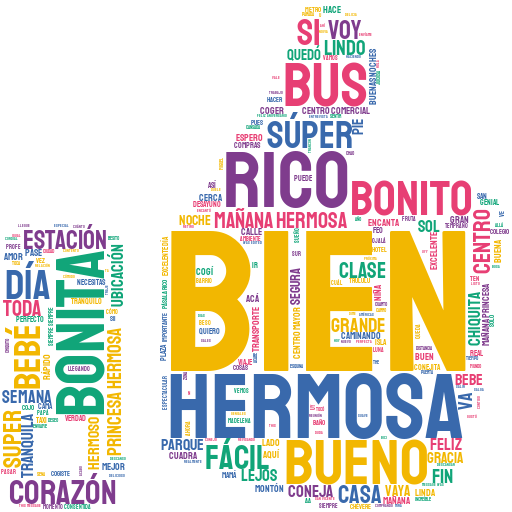

In [49]:
stylecloud.gen_stylecloud(' '.join(df2[df2["sentiment_binned"] == "Positive"]["Message_Modified"]),
                          icon_name = "fas fa-thumbs-up",
                          output_name = "Images/sentiment_spanish_pos.png",
                          custom_stopwords = stop_words_spanish)

Image("Images/sentiment_spanish_pos.png")

#### Negative Words

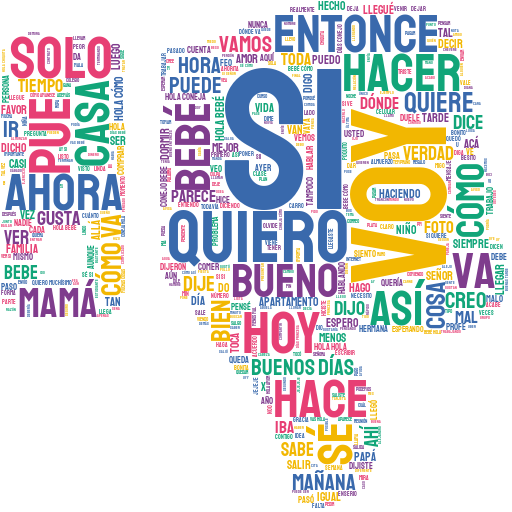

In [50]:
stylecloud.gen_stylecloud(' '.join(df2[df2["sentiment_binned"] == "Negative"]["Message_Modified"]),
                          icon_name = "fas fa-thumbs-down",
                          output_name = "Images/sentiment_spanish_neg.png",
                          custom_stopwords = stop_words_spanish)

Image("Images/sentiment_spanish_neg.png")

### **Translation**
The *Spanish Sentiment Analysis* didn't get good results. Now we want to try to perform a Sentiment Analysis with the Messages Translations to English.

In [51]:
df3 = pd.read_csv("chat_translated.csv")
df3

,index,Date,User,Message_Modified,Sentiment,sentiment_binned,Message_Translated
0,0,2020-11-30,A,te quiero conejita,0.209633,Negative,I love you bunny
1,1,2020-11-30,L,más amor como de conejo,0.210284,Negative,more love like a rabbit
2,2,2020-11-30,L,que haces,0.302997,Negative,what are you doing
3,3,2020-11-30,A,programando bebé,0.388172,Neutral,programming baby
4,4,2020-11-30,A,y pensandote mucho,0.347310,Neutral,and thinking a lot
...,...,...,...,...,...,...,...
55185,55202,2024-02-14,L,sipo,0.497892,Neutral,yep
55186,55203,2024-02-14,L,me haces un favor,0.070254,Negative,Can you do me a favor
55187,55204,2024-02-14,L,fecha de hoy en ingles,0.032891,Negative,today's date in english
55188,55205,2024-02-14,A,wednesday,0.497892,Neutral,wednesday


### **Text Blob** Sentiment Analysis

In [52]:
from textblob import TextBlob

In [53]:
df3["TextBlob_Polarity"] = df3["Message_Translated"].apply(lambda x : TextBlob(str(x)).sentiment.polarity)
bins_text_blob = np.linspace(-1, 1, 4)
df3["sentiment_binned_text_blob"] = pd.cut(df3["TextBlob_Polarity"], bins_text_blob, labels = group_sentiment, include_lowest = True)
df3

,index,Date,User,Message_Modified,Sentiment,sentiment_binned,Message_Translated,TextBlob_Polarity,sentiment_binned_text_blob
0,0,2020-11-30,A,te quiero conejita,0.209633,Negative,I love you bunny,0.5,Positive
1,1,2020-11-30,L,más amor como de conejo,0.210284,Negative,more love like a rabbit,0.5,Positive
2,2,2020-11-30,L,que haces,0.302997,Negative,what are you doing,0.0,Neutral
3,3,2020-11-30,A,programando bebé,0.388172,Neutral,programming baby,0.0,Neutral
4,4,2020-11-30,A,y pensandote mucho,0.347310,Neutral,and thinking a lot,0.0,Neutral
...,...,...,...,...,...,...,...,...,...
55185,55202,2024-02-14,L,sipo,0.497892,Neutral,yep,0.0,Neutral
55186,55203,2024-02-14,L,me haces un favor,0.070254,Negative,Can you do me a favor,0.0,Neutral
55187,55204,2024-02-14,L,fecha de hoy en ingles,0.032891,Negative,today's date in english,0.0,Neutral
55188,55205,2024-02-14,A,wednesday,0.497892,Neutral,wednesday,0.0,Neutral


In [54]:
px.line(df3[["Date", "TextBlob_Polarity"]].groupby("Date").mean().reset_index(),
        x = "Date",
        y = "TextBlob_Polarity",
        title = "Sentiment per Day [Text Blob]",
        color_discrete_sequence = ["#8E44AD"])

Positive Message Example

In [55]:
df3[df3["Date"] == "2023-11-06"]["Message_Translated"].to_list()

['nice']

Negative Message Example

In [56]:
df3[df3["Date"] == "2021-12-30"]["Message_Translated"].to_list()

['silly']

In [57]:
px.line(df3[["Date", "TextBlob_Polarity", "User"]].groupby(["Date", "User"]).mean().reset_index(),
        x = "Date",
        y = "TextBlob_Polarity",
        title = "Sentiment per Day - Users [Text Blob]",
        color = "User")

In [58]:
px.pie(df3["sentiment_binned_text_blob"].value_counts().reset_index(), 
       values = "count", 
       names = "sentiment_binned_text_blob",
       hole = 0.5, 
       color_discrete_sequence = ["#D98880", "#F9E79F", "#A9DFBF"],
       title = "Sentiment Values Distribution [Text Blob]")


In [59]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df3[df3["User"] == "A"]["sentiment_binned_text_blob"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>A</b>', font = dict(size = 16))), 1, 1)
fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df3[df3["User"] == "L"]["sentiment_binned_text_blob"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>L</b>', font = dict(size = 16))), 1, 2)

fig.update_traces(hole = 0.5, hoverinfo = 'label+value')
fig.update_layout(title = "Sentiment Values Distribution - Users [Text Blob]")

In [60]:
stop_words_english = get_stop_words("english")

#### Positive Words

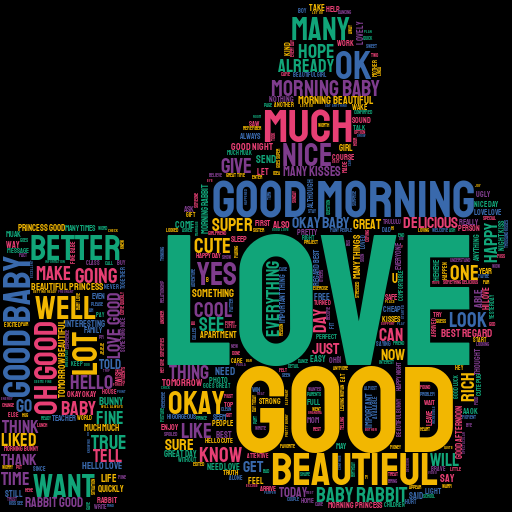

In [61]:
stylecloud.gen_stylecloud(' '.join(df3[df3["sentiment_binned_text_blob"] == "Positive"]["Message_Translated"]),
                          icon_name = "fas fa-thumbs-up",
                          output_name = "Images/sentiment_text_blob_pos.png",
                          custom_stopwords = stop_words_english,
                          background_color="black")

Image("Images/sentiment_text_blob_pos.png")

#### Negative Words

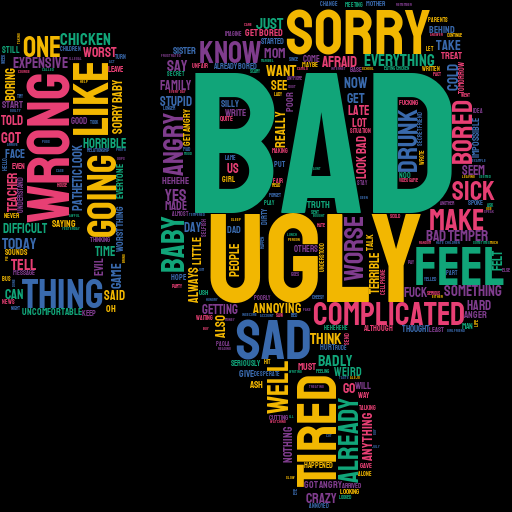

In [62]:
stylecloud.gen_stylecloud(' '.join(df3[df3["sentiment_binned_text_blob"] == "Negative"]["Message_Translated"]),
                          icon_name = "fas fa-thumbs-down",
                          output_name = "Images/sentiment_text_blob_neg.png",
                          custom_stopwords = stop_words_english,
                          background_color="black")

Image("Images/sentiment_text_blob_neg.png")

### **NLTK** Sentiment Analysis

In [63]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\acast\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\acast\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\acast\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\acast\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\acast\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [65]:
df3["NLTK_Polarity"] = df3["Message_Translated"].apply(lambda x : sia.polarity_scores(str(x))["compound"])

bins_nltk = np.array([-1, -0.05, 0.05, 1])
df3["sentiment_binned_NLTK"] = pd.cut(df3["NLTK_Polarity"], bins_nltk, labels = group_sentiment, include_lowest = True)
df3

,index,Date,User,Message_Modified,Sentiment,sentiment_binned,Message_Translated,TextBlob_Polarity,sentiment_binned_text_blob,NLTK_Polarity,sentiment_binned_NLTK
0,0,2020-11-30,A,te quiero conejita,0.209633,Negative,I love you bunny,0.5,Positive,0.6369,Positive
1,1,2020-11-30,L,más amor como de conejo,0.210284,Negative,more love like a rabbit,0.5,Positive,0.8059,Positive
2,2,2020-11-30,L,que haces,0.302997,Negative,what are you doing,0.0,Neutral,0.0000,Neutral
3,3,2020-11-30,A,programando bebé,0.388172,Neutral,programming baby,0.0,Neutral,0.0000,Neutral
4,4,2020-11-30,A,y pensandote mucho,0.347310,Neutral,and thinking a lot,0.0,Neutral,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
55185,55202,2024-02-14,L,sipo,0.497892,Neutral,yep,0.0,Neutral,0.2960,Positive
55186,55203,2024-02-14,L,me haces un favor,0.070254,Negative,Can you do me a favor,0.0,Neutral,0.4019,Positive
55187,55204,2024-02-14,L,fecha de hoy en ingles,0.032891,Negative,today's date in english,0.0,Neutral,0.0000,Neutral
55188,55205,2024-02-14,A,wednesday,0.497892,Neutral,wednesday,0.0,Neutral,0.0000,Neutral


In [66]:
px.line(df3[["Date", "NLTK_Polarity"]].groupby("Date").mean().reset_index(),
        x = "Date",
        y = "NLTK_Polarity",
        title = "Sentiment per Day [NLKT]",
        color_discrete_sequence = ["#8E44AD"])

Positive Message Example

In [67]:
df3[df3["Date"] == "2022-04-02"]["Message_Translated"].to_list()

["let's make a playlist as a team join and edit it cool music"]

Negative Message Example

In [68]:
df3[df3["Date"] == "2021-10-17"]["Message_Translated"].to_list()

['um seriously', 'it will be very bad', 'with your family', 'I feel all bad']

In [69]:
px.line(df3[["Date", "NLTK_Polarity", "User"]].groupby(["Date", "User"]).mean().reset_index(),
        x = "Date",
        y = "NLTK_Polarity",
        title = "Sentiment per Day - Users [NLTK]",
        color = "User")

In [70]:
px.pie(df3["sentiment_binned_NLTK"].value_counts().reset_index(), 
       values = "count", 
       names = "sentiment_binned_NLTK",
       hole = 0.5, 
       color_discrete_sequence = ["#D98880", "#F9E79F", "#A9DFBF"],
       title = "Sentiment Values Distribution [NLTK]")


In [71]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df3[df3["User"] == "A"]["sentiment_binned_NLTK"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>A</b>', font = dict(size = 16))), 1, 1)
fig.add_trace(go.Pie(labels = ['Negative', 'Neutral', 'Positive'],
                     values = df3[df3["User"] == "L"]["sentiment_binned_NLTK"].value_counts().reset_index()["count"],
                     marker = dict(colors = ["#D98880", "#F9E79F", "#A9DFBF"]),
                     title = dict(text = '<b>L</b>', font = dict(size = 16))), 1, 2)

fig.update_traces(hole = 0.5, hoverinfo = 'label+value')
fig.update_layout(title = "Sentiment Values Distribution - Users [NLTK]")

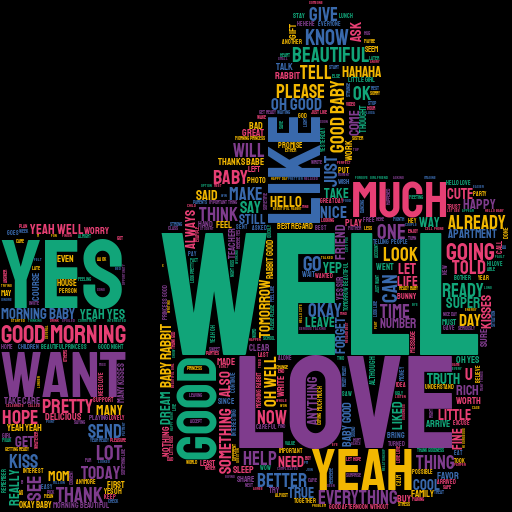

In [74]:
stylecloud.gen_stylecloud(' '.join(df3[df3["sentiment_binned_NLTK"] == "Positive"]["Message_Translated"]),
                          icon_name = "fas fa-thumbs-up",
                          output_name = "Images/sentiment_NLTK_pos.png",
                          custom_stopwords = stop_words_english,
                          background_color="black")

Image("Images/sentiment_NLTK_pos.png")


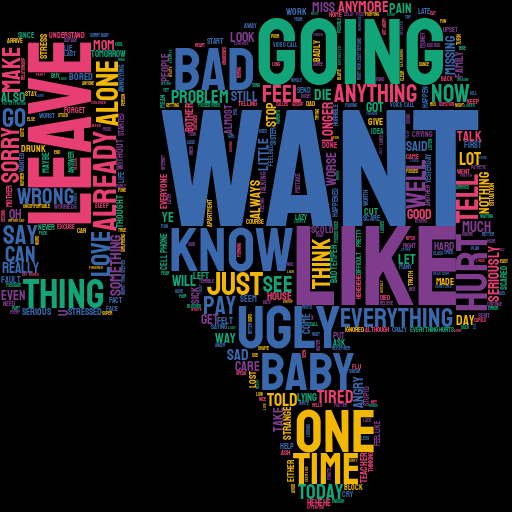

In [73]:
stylecloud.gen_stylecloud(' '.join(df3[df3["sentiment_binned_NLTK"] == "Negative"]["Message_Translated"]),
                          icon_name = "fas fa-thumbs-down",
                          output_name = "Images/sentiment_NLTK_neg.png",
                          custom_stopwords = stop_words_english,
                          background_color="black")

Image("Images/sentiment_NLTK_neg.png")

### **References**
* [From Chat to Insights: Analyzing WhatsApp Group Conversations](https://medium.com/@barklight/cracking-the-conversation-973839be5b88)
* [WhatsApp Message Exploratory Data Analysis(EDA)](https://medium.com/@edsenmichaelcy/whatsapp-message-exploratory-data-analysis-eda-538560ee1c99)
* [Exploring WhatsApp data](https://towardsdatascience.com/analyzing-whatsapp-chats-with-python-20d62ce7fe2d)
* [Sentiment Analysis using VADER](https://akladyous.medium.com/sentiment-analysis-using-vader-c56bcffe6f24)
* [Making Natural Language Processing easy with TextBlob](https://www.analyticsvidhya.com/blog/2021/10/making-natural-language-processing-easy-with-textblob/)